## Airbnb price prediction

### Business questions?

#### 1. How is the evolution of price along the years and month in Boston?
#### 2.How do we compare the evolution of price between Boston and Seattle?
#### 3. What are the features most influence on the price?
#### 4. Are the most predictive features of Seattle different from Boston?


### Upload packages

**Since I don´t know how the model is and which model I should use, I have uploaded the most frequent used data processing and modeling packages.**

In [12]:
#load the packages I need for this analysis
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from datetime import datetime
import datetime as dt 
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.base import clone
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from math import sqrt
from sklearn.preprocessing import MultiLabelBinarizer
from collections import defaultdict

### Access the data -  Boston airbnb calender data

In [13]:
#Read the boston airbnb info
calender_boston = pd.read_csv('calendar.csv')

In [14]:
#See how the dataframe look like and what info is inside
calender_boston.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,225224,2019-02-09,t,$105.00,$105.00,1,365
1,225224,2019-02-10,t,$105.00,$105.00,1,365
2,225224,2019-02-11,t,$105.00,$105.00,1,365
3,225224,2019-02-12,t,$105.00,$105.00,1,365
4,225224,2019-02-13,t,$105.00,$105.00,1,365
5,225224,2019-02-14,t,$105.00,$105.00,1,365
6,225224,2019-02-15,t,$105.00,$105.00,1,365
7,225224,2019-02-16,t,$105.00,$105.00,1,365
8,225224,2019-02-17,t,$105.00,$105.00,1,365
9,225224,2019-02-18,t,$105.00,$105.00,1,365


In [15]:
#Check the data type
calender_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246575 entries, 0 to 2246574
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 120.0+ MB


### Clean the data -  Boston airbnb calender data

In [16]:
# I am actually just interested in knowing the year and month. So I will just extract the year and month
calender_boston['year_month'] = calender_boston['date'] .apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y-%m"))

In [17]:
calender_boston['year_month_time'] = pd.to_datetime(calender_boston['year_month'])

In [18]:
#Since we can see the format of "price" and "adjusted_price" start with "$", we should firstly remove it
calender_boston['price'] = calender_boston['price'].str.lstrip('$')
calender_boston['adjusted_price'] = calender_boston['adjusted_price'].str.lstrip('$')
#Now let's convert the string into float by removing ","
calender_boston['price'] = calender_boston['price'].str.replace(',','')
calender_boston['adjusted_price'] = calender_boston['adjusted_price'].str.replace(',','')
calender_boston['price'] = pd.to_numeric(calender_boston['price'])
calender_boston['adjusted_price'] = pd.to_numeric(calender_boston['adjusted_price'])

In [19]:
calender_boston['listing_id'] = calender_boston['listing_id'].astype(str)

In [20]:
calender_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246575 entries, 0 to 2246574
Data columns (total 9 columns):
listing_id         object
date               object
available          object
price              float64
adjusted_price     float64
minimum_nights     int64
maximum_nights     int64
year_month         object
year_month_time    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 154.3+ MB


### Analize and Visualize the data -  Boston airbnb calender data

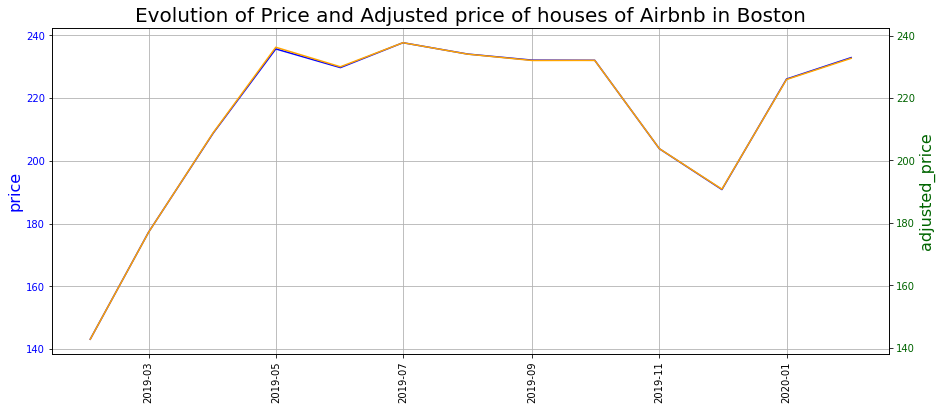

In [25]:
fig, ax1 = plt.subplots(figsize=(15,6))
x = calender_boston.groupby(['year_month_time'])['price'].mean()
y = calender_boston.groupby(['year_month_time'])['adjusted_price'].mean()
plt.title('Evolution of Price and Adjusted price of houses of Airbnb in Boston', fontsize=20)
plt.xticks(rotation=90)
ax1.grid(True)
ax1.plot(x,color="blue")
ax1.set_ylabel(r"price", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="orange")
ax2.set_ylabel(r"adjusted_price", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

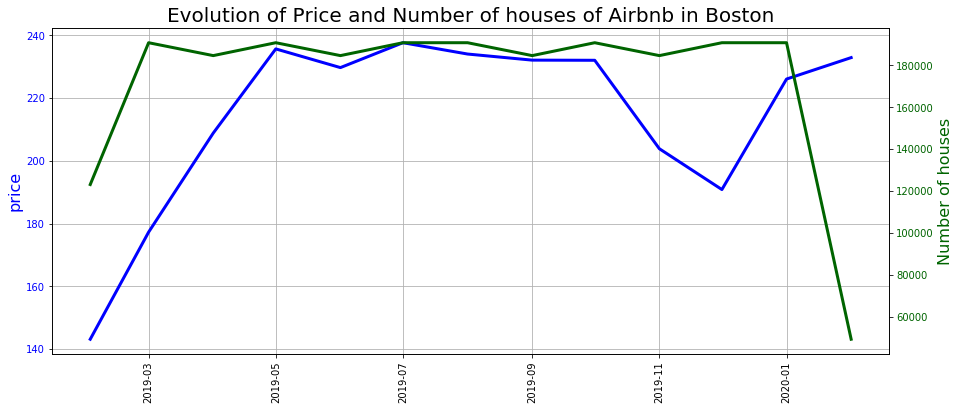

In [24]:
fig, ax1 = plt.subplots(figsize=(15,6))
x = calender_boston.groupby(['year_month_time'])['price'].mean()
y = calender_boston.groupby(['year_month_time'])['listing_id'].count()
plt.title('Evolution of Price and Number of houses of Airbnb in Boston', fontsize=20)
plt.xticks(rotation=90)
ax1.grid(True)
ax1.plot(x,color="blue", linewidth=3)
ax1.set_ylabel(r"price", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen", linewidth=3)
ax2.set_ylabel(r"Number of houses", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

#### As we can see from this graph the price of Boston airbnb has been boosted from February 2019 to May of 2019 while the numbers of houses have been increased massively from Feb 2019 to March 2019. From May of 2019 the house price and number will keep high until October of 2019, the price of these houses will have a dramatic drop until end of 2019, it will boost again from 2020. But the number of house might decrease because of the drop of price.

### Create a function to put all the previous clean process in it.

In [26]:
#Create a function to put all the actions I did before to clean the data.

def clean_data_calender(df):
    '''Output of this function is a clean data after applying for all the data cleanning process.
    
    Input: 
    1.change the data data to a better format.
    2.Remove the currency unit "$" from all the money columns.
    3.Convert the columns into numeric
    4.Convert the "id" column into a string format for counting it.
    '''
    
    # Change the data YYYY-MM-DD to YYYY-MM and convert it into datetime
    df['year_month'] = df['date'] .apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime("%Y-%m"))
    df['year_month_time'] = pd.to_datetime(df['year_month'])
    
    #Since we can see the format of "price" and "adjusted_price" start with "$", we should firstly remove it
    df['price'] = df['price'].str.lstrip('$')
    df['adjusted_price'] = df['adjusted_price'].str.lstrip('$')
    #Now let's convert the string into float by removing ","
    df['price'] = df['price'].str.replace(',','')
    df['adjusted_price'] = df['adjusted_price'].str.replace(',','')
    df['price'] = pd.to_numeric(df['price'])
    df['adjusted_price'] = pd.to_numeric(df['adjusted_price'])
    
    # Convert the id into a string
    df['listing_id'] = df['listing_id'].astype(str)
    
    new_data = df
    return new_data

### Access the data - Seattle airbnb Calender data

In [29]:
calender_seattle = pd.read_csv('calendar_1.csv')

### Clean the data -  Seattile airbnb calender data

In [30]:
new_data = clean_data_calender(calender_seattle) 

### Analyze and visualize the data -  Seattile airbnb calender data

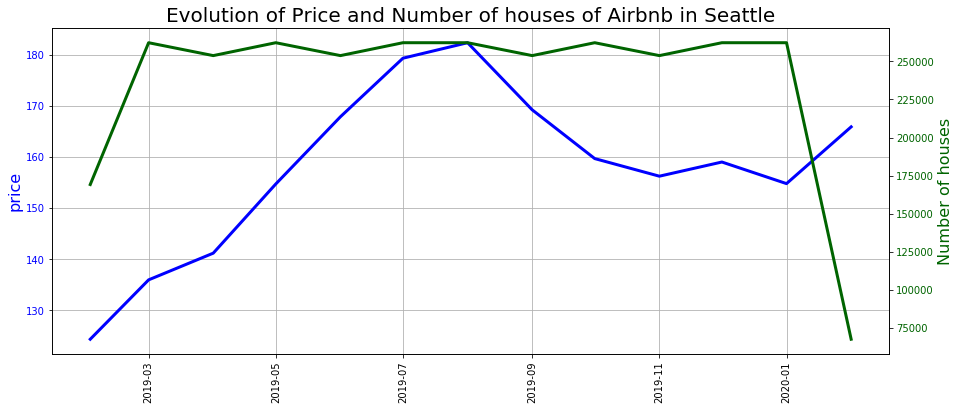

In [33]:
fig, ax1 = plt.subplots(figsize=(15,6))
x = new_data.groupby(['year_month_time'])['price'].mean()
y = new_data.groupby(['year_month_time'])['listing_id'].count()
plt.title('Evolution of Price and Number of houses of Airbnb in Seattle', fontsize=20)
plt.xticks(rotation=90)
ax1.grid(True)
ax1.plot(x,color="blue", linewidth=3)
ax1.set_ylabel(r"price", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(y, color="darkgreen", linewidth=3)
ax2.set_ylabel(r"Number of houses", fontsize=16, color="darkgreen")
for label in ax2.get_yticklabels():
    label.set_color("darkgreen")

## Seattle VS Boston

#### As we can see from these 2 graphs of the evolution of the house price and number in Seattle and Boston. The trend of the numbers of house are the same. But you can see that the price has less impact on the number of the house in Seattle than Boston. The price of the house in Seattle has the peak at August 2019 because of the summer season, later it decreases. But the price in Boston keeps high from May to October. 

### Access the data -  Boston airbnb listing data

In [139]:
#Now lets look at another dataframe
listing_boston = pd.read_csv('listings.csv')
listing_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,f,super_strict_30,f,f,1,1,0,0,0.32
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,t,f,strict_14_with_grace_period,f,f,6,6,0,0,0.73
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,f,moderate,t,f,1,0,1,0,0.64
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,f,strict_14_with_grace_period,f,f,10,10,0,0,0.40


In [140]:
listing_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 5.0+ MB


### Clean the data

In [141]:
#I am interested in knowing how much columns with missing value
sum(listing_boston.isnull().sum())

95892

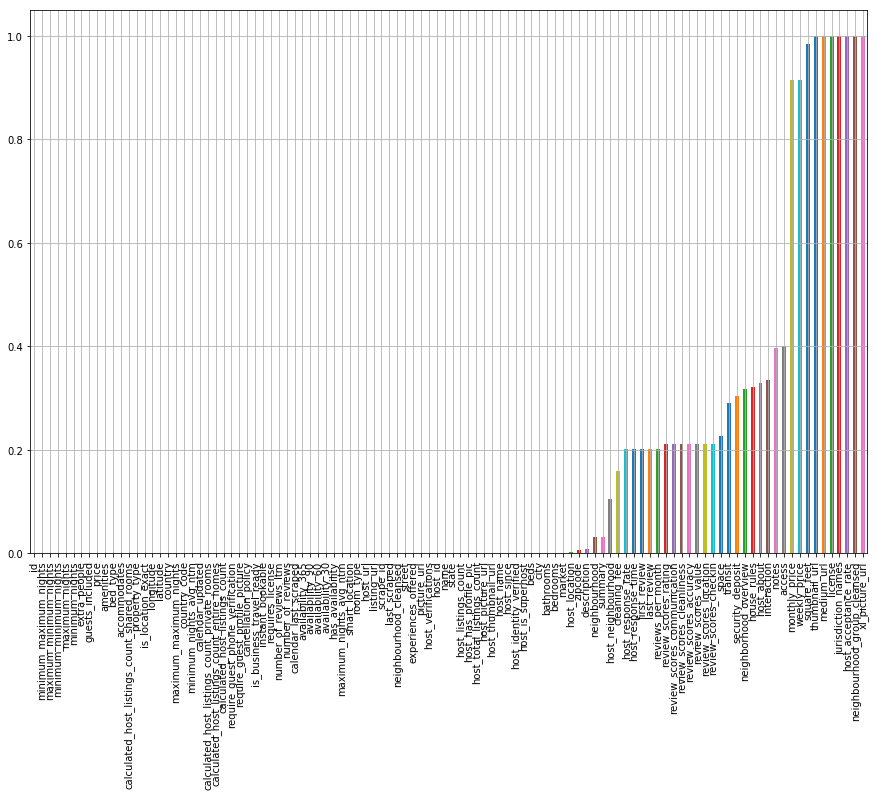

In [142]:
#I am interested in looking at what is the porcentage of these missing value columns, which has the most missing value.
missing_percentage = listing_boston.isnull().sum()/listing_boston.shape[0]
missing_percentage_plot = missing_percentage.sort_values(ascending=True)
missing_percentage_plot.plot.bar(figsize=(15,10), grid=True)

In [143]:
#There are several columns have the very high percentage of the missing value, more than 80%, it might be better drop it, 
#with so many missing value, it might not affect on the price prediction.
drop_selected_columns = [col for col in listing_boston.columns if (listing_boston[col].isnull().sum()/
                                                                   listing_boston.shape[0]>0.8)]
drop_selected_columns

['thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'license',
 'jurisdiction_names']

In [144]:
# Remove the outlier columns from the dataset
for col in drop_selected_columns:
    listing_boston.drop(col, axis=1, inplace=True)

In [145]:
listing_boston.shape

(6155, 96)

I have removed the columns which contains more than 80% of missing data, for having a tidy data, we also need to clean the rows.

In [146]:
#Now lets see how much data is missing in each row of the dataset?
sum(listing_boston.isnull().sum(axis=1))

35496

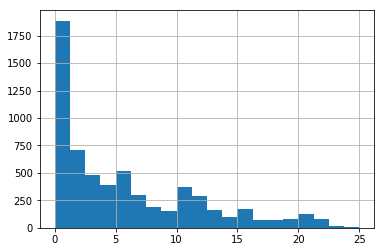

In [147]:
#Plot the distribution of rows with missing data.
listing_boston.isnull().sum(axis=1).hist(bins = 20)

As we can see in the graph, most of the rows do not have any missing data. But there are still some rows have more than 20 missing datas. Remember after removing more than 80% missing data columns we still have 96 columns, the rows with more than 20 missing data means they have more than 20% missing data. We might need to do something with it, we can either drop them or fill them with the mode number.

In [148]:
#Lets count how many rows with more than 25 missing value
sum(listing_boston.isnull().sum(axis=1) > 20)

150

In [149]:
sum(listing_boston.isnull().sum(axis=1) > 20)/listing_boston.shape[0]

0.024370430544272948

As we can see the rows with more than 25 missing vale are actually only occuppies 2% of the whole rows, it does not matter much if we keep them. If I don't drop them then I need to fill them.

In [150]:
#Count each datatype.
listing_boston.dtypes.value_counts()

object     58
int64      21
float64    17
dtype: int64

In [151]:
#Let's check these columns see how many unique value are in each value.
listing_boston.select_dtypes(include=['object']).nunique().sort_values()

last_scraped                           1
is_business_travel_ready               1
requires_license                       1
experiences_offered                    1
calendar_last_scraped                  1
has_availability                       1
state                                  1
country_code                           1
country                                1
require_guest_phone_verification       2
require_guest_profile_picture          2
host_is_superhost                      2
market                                 2
is_location_exact                      2
instant_bookable                       2
host_identity_verified                 2
host_has_profile_pic                   2
room_type                              3
host_response_time                     4
bed_type                               5
cancellation_policy                    6
property_type                         21
neighbourhood_cleansed                25
neighbourhood                         29
city            

In [152]:
listing_boston.amenities.head()

0    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
3    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
4    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

In [153]:
amenities = listing_boston['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").
                                           replace("}", "") for amenity in d.split(",")])

listing_boston['amenities'] = amenities
possible_amenities = set([item for sublist in amenities for item in sublist])
possible_amenities = list(possible_amenities)
del possible_amenities[1]
print("There are {} amenities in total.".format(len(possible_amenities)))

There are 121 amenities in total.


In [154]:
mlb = MultiLabelBinarizer()
amenities_result = pd.DataFrame(mlb.fit_transform(listing_boston['amenities']),
                                columns=mlb.classes_, index=listing_boston.index)

In [155]:
listing_boston = pd.concat([listing_boston, amenities_result], axis=1, sort = False)
listing_boston.drop(['amenities'], axis = 1, inplace = True)

In [156]:
listing_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Wheelchair accessible,Wide clearance to bed,Wide clearance to shower,Wide doorway,Wide entryway,Wide hallway clearance,Wifi,Window guards,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,0,0,0,0,0,0,1,0,1,1
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,0,0,0,0,0,0,1,0,0,0
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,0,0,0,0,0,0,1,0,0,0
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,0,0,0,0,0,0,1,0,1,1
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,0,0,0,0,0,0,1,0,0,0


From here we can see some columns we can drop, the columns with only one unique value, and the columns with many different values. 

In [157]:
#lets put the this in a dataframe to use better later.
unique_value = listing_boston.select_dtypes(include=['object']).nunique()

In [158]:
#Choose the unique value is 1 and more than 1000 then put them into 2 different dataframes to drop it later.
unique_value_is_1 = unique_value[unique_value==1].index
unique_value_more_than1000 = unique_value[unique_value > 1000].index & unique_value[unique_value < 4900].index

In [159]:
#Now drop the ones with unique value equal to 1 and more than 1000
listing_boston = listing_boston.drop(columns =unique_value_is_1,axis=1)
listing_boston = listing_boston.drop(columns =unique_value_more_than1000,axis=1)

In [160]:
#Check the result
listing_boston.select_dtypes(include=['object']).nunique().sort_values()

require_guest_phone_verification       2
host_identity_verified                 2
host_has_profile_pic                   2
require_guest_profile_picture          2
host_is_superhost                      2
is_location_exact                      2
instant_bookable                       2
market                                 2
room_type                              3
host_response_time                     4
bed_type                               5
cancellation_policy                    6
property_type                         21
neighbourhood_cleansed                25
neighbourhood                         29
city                                  37
smart_location                        39
street                                39
zipcode                               41
host_response_rate                    43
extra_people                          50
host_neighbourhood                    60
security_deposit                      63
calendar_updated                      68
cleaning_fee    

Alright, now we get a bit cleaner the dataset, but we still need to drop more these items which are not useful for our model. Speciall drop the ones with a lot of different unique value in it, also the ones might be not related to the house.

Some items I think might not related to the price are:

**description, name, picture_url,listing_url:** Non sense to keep them.

**Last_review:** is the date that updated the last information.

**host_location:** where does the landloard live, i think people will not care about this when they rent a flat.

**host_verifications:** also something related with the landloard, but there is one 'host_identity_verified' similar to this, but that one will be more useful than this one.

**calender_updated:** the calender when the landloard updated the info.

**host_neighbourhood:** there are another 2 items similar to this one 'neighbourhood_cleansed' and 'neighbourhood'. We might only choose one is enough.

**smart_location:** is the same as city.

**neighbourhood_cleansed:** cannot find the meaning of this item, but we can use'neighbourhood' instead of this one.

**street:** is actually city and country, is not the street address.

**Zipcode:** I will not include this in.

In [161]:
to_drop = ['last_review', 'host_location','host_verifications','calendar_updated','host_neighbourhood',
           'smart_location','neighbourhood_cleansed', 'street','zipcode','description', 'name', 
           'picture_url','listing_url']

listing_boston = listing_boston.drop(columns =to_drop,axis=1)

In [162]:
listing_boston.select_dtypes(include=['object']).nunique().sort_values()

require_guest_phone_verification      2
instant_bookable                      2
host_is_superhost                     2
host_has_profile_pic                  2
host_identity_verified                2
require_guest_profile_picture         2
market                                2
is_location_exact                     2
room_type                             3
host_response_time                    4
bed_type                              5
cancellation_policy                   6
property_type                        21
neighbourhood                        29
city                                 37
host_response_rate                   43
extra_people                         50
security_deposit                     63
cleaning_fee                        148
price                               398
dtype: int64

Now is much cleaner, but obviously there are some items should not be in a string format, "price", "monthly_price", "weekly_price", "cleaning_fee", "security_deposit", "host_response_rate", "extra_people", they should all be in numeric. Lets do this transformation.

In [163]:
#Since we can see the format of "price" and "adjusted_price" start with "$", we should firstly remove it
listing_boston['price'] = listing_boston['price'].str.lstrip('$')
listing_boston['cleaning_fee'] = listing_boston['cleaning_fee'].str.lstrip('$')
listing_boston['security_deposit'] = listing_boston['security_deposit'].str.lstrip('$')
listing_boston['extra_people'] = listing_boston['extra_people'].str.lstrip('$')
#Now let's convert the string into float by removing ","
listing_boston['price'] = listing_boston['price'].str.replace(',','')
listing_boston['cleaning_fee'] = listing_boston['cleaning_fee'].str.replace(',','')
listing_boston['security_deposit'] = listing_boston['security_deposit'].str.replace(',','')
listing_boston['extra_people'] = listing_boston['extra_people'].str.replace(',','')
listing_boston['price'] = pd.to_numeric(listing_boston['price'])
listing_boston['cleaning_fee'] = pd.to_numeric(listing_boston['cleaning_fee'])
listing_boston['security_deposit'] = pd.to_numeric(listing_boston['security_deposit'])
listing_boston['extra_people'] = pd.to_numeric(listing_boston['extra_people'])

In [164]:
#lets check the "host_response_rate" column
listing_boston.host_response_rate.head()

0    100%
1    100%
2    100%
3     NaN
4     93%
Name: host_response_rate, dtype: object

In [165]:
#Lets remove the % in the "host_response_rate" and convert this column into number.
listing_boston['host_response_rate'] = listing_boston['host_response_rate'].str.rstrip('%')
listing_boston['host_response_rate'] = pd.to_numeric(listing_boston['host_response_rate'])

In [166]:
#Lets check the "city" column
listing_boston.city.value_counts()

Boston                    5979
Roxbury Crossing            21
Dorchester                  19
Jamaica Plain               15
Dorchester                  15
Charlestown                 14
Brighton                    11
East Boston                  8
Brookline                    7
Somerville                   7
West Roxbury                 6
Allston                      5
ROXBURY CROSSING             5
Cambridge                    4
Roslindale                   4
Boston                       4
波士顿                          3
Roxbury                      2
Hyde Park                    2
Dorchster                    2
boston                       1
Boston (Charlestown)         1
South Boston                 1
Jamaica Plain (Boston)       1
Dedham                       1
Mattapan                     1
Roslindale, Boston           1
Boston (Jamaica Plain)       1
ALLSTON                      1
Dorchester Center            1
Jamaica Plain, Boston        1
Jamaica Plain                1
Boston, 

You can see there is one Chinese word, it actually means "Boston", lets translate it into English.

In [167]:
listing_boston.city = listing_boston.city.str.replace('波士顿', 'Boston')

In [168]:
listing_boston.city.value_counts()

Boston                    5982
Roxbury Crossing            21
Dorchester                  19
Jamaica Plain               15
Dorchester                  15
Charlestown                 14
Brighton                    11
East Boston                  8
Brookline                    7
Somerville                   7
West Roxbury                 6
Allston                      5
ROXBURY CROSSING             5
Roslindale                   4
Cambridge                    4
Boston                       4
Roxbury                      2
Hyde Park                    2
Dorchster                    2
Roslindale, Boston           1
South Boston                 1
Boston (Charlestown)         1
Jamaica Plain (Boston)       1
Dedham                       1
boston                       1
Mattapan                     1
Boston (Jamaica Plain)       1
ALLSTON                      1
Dorchester Center            1
Jamaica Plain, Boston        1
Jamaica Plain                1
Boston,                      1
Lexingto

In [169]:
#now is turn to do the binary value transformation. Remember we had create the unique_value dataframe to put all the unique data 
#sum in it.
unique_value[unique_value == 2]

host_is_superhost                   2
host_has_profile_pic                2
host_identity_verified              2
market                              2
is_location_exact                   2
instant_bookable                    2
require_guest_profile_picture       2
require_guest_phone_verification    2
dtype: int64

In [170]:
listing_boston.host_has_profile_pic.value_counts()

t    6146
f       7
Name: host_has_profile_pic, dtype: int64

There are only 7 host does not have profile, is not relevant enough to train our model, we can drop it.

In [171]:
listing_boston.market.value_counts()

Boston                   6144
Other (International)       1
Name: market, dtype: int64

There is only one different value from another, is not relevant enough to train our model, we can drop it.

In [172]:
#I will drop the column "host_has_profile_pic", "market"
listing_boston = listing_boston.drop(['market', 'host_has_profile_pic'], axis=1)

In [173]:
listing_boston.select_dtypes(include=['object']).nunique().sort_values()

host_is_superhost                    2
host_identity_verified               2
is_location_exact                    2
instant_bookable                     2
require_guest_profile_picture        2
require_guest_phone_verification     2
room_type                            3
host_response_time                   4
bed_type                             5
cancellation_policy                  6
property_type                       21
neighbourhood                       29
city                                36
dtype: int64

In [174]:
# Now lets see the numeric data
listing_boston.select_dtypes(include=['float64', 'int64']).nunique().sort_values()

scrape_id                                          1
calculated_host_listings_count_shared_rooms        6
review_scores_value                                8
review_scores_checkin                              8
review_scores_accuracy                             9
review_scores_cleanliness                          9
review_scores_location                             9
bedrooms                                           9
review_scores_communication                        9
bathrooms                                         12
guests_included                                   12
beds                                              16
accommodates                                      16
calculated_host_listings_count_private_rooms      19
availability_30                                   31
calculated_host_listings_count_entire_homes       35
calculated_host_listings_count                    41
minimum_minimum_nights                            42
host_response_rate                            

In [175]:
#lets put the this in a dataframe to use better later.
unique_value_int = listing_boston.select_dtypes(include=['float64', 'int64']).nunique()
#Choose the unique value is 1 and more than 1000 then put them into 2 different dataframes to drop it later.
unique_value_int_more_than400 = unique_value_int[unique_value_int>400].index
unique_value_int_between350and50 = unique_value_int[unique_value_int>50].index & unique_value_int[unique_value_int<350].index
unique_value_int_is1= unique_value_int[unique_value_int == 1].index

In [176]:
# Drop them
listing_boston = listing_boston.drop(columns = unique_value_int_between350and50,axis=1)
listing_boston = listing_boston.drop(columns = unique_value_int_more_than400, axis=1)
listing_boston = listing_boston.drop(columns = unique_value_int_is1, axis=1)

In [177]:
listing_boston.select_dtypes(include=['float64', 'int64']).nunique().sort_values()

calculated_host_listings_count_shared_rooms       6
review_scores_value                               8
review_scores_checkin                             8
bedrooms                                          9
review_scores_location                            9
review_scores_communication                       9
review_scores_cleanliness                         9
review_scores_accuracy                            9
bathrooms                                        12
guests_included                                  12
accommodates                                     16
beds                                             16
calculated_host_listings_count_private_rooms     19
availability_30                                  31
calculated_host_listings_count_entire_homes      35
calculated_host_listings_count                   41
minimum_minimum_nights                           42
minimum_nights                                   43
host_response_rate                               43
review_score

In [178]:
# Drop some columns will not affect on the price
listing_boston = listing_boston.drop(['availability_365','accommodates', 'minimum_nights', 'calculated_host_listings_count', 
                                      'calculated_host_listings_count_entire_homes','availability_30', 
                                      'calculated_host_listings_count_private_rooms',
                                      'calculated_host_listings_count_shared_rooms',
                                     'maximum_minimum_nights','minimum_minimum_nights'], axis=1)

In [179]:
#Create a loop to fill all the missing value cols with mode, so there will not be rows with missing value.
num_vars = listing_boston.select_dtypes(include=['float64', 'int64']).columns
for col in num_vars:
    listing_boston[col].fillna((listing_boston[col].mean()), inplace=True)

Now we have few categorical values, we can neither dummy them into numerical value or think again whether we really need keep them or we should drop them.

In [180]:
cat_listing_boston = listing_boston.select_dtypes(include=['object'])

In [181]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_listing_boston.columns

#Create a dataframe that contains all columns that were not specified as categorical, removes all the original columns in
#cat_listing_boston, dummy columns for each of the categorical columns in cat_listing_boston, and use a prefix of the column
#name with an underscore(_) for separating.

def create_dummy_df(df, cat_cols, dummy_na):

    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [182]:
#Use your newly created function
new_listing_boston = create_dummy_df(listing_boston, cat_cols_lst, dummy_na=False)

In [183]:
listing_boston.shape

(6155, 149)

In [184]:
new_listing_boston.shape

(6155, 239)

In [185]:
new_listing_boston.head()

,host_response_rate,bathrooms,bedrooms,beds,price,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,require_guest_phone_verification_t
0,100.000000,1.0,1.0,1.0,125.0,2,0.0,99.0,10.0,10.0,...,0,1,0,0,0,0,1,0,0,0
1,100.000000,1.0,1.0,1.0,145.0,1,0.0,95.0,10.0,10.0,...,0,1,1,0,0,1,0,0,0,0
2,100.000000,1.0,1.0,2.0,169.0,2,8.0,97.0,10.0,10.0,...,0,1,1,0,0,1,0,0,0,0
3,94.819605,1.0,1.0,1.0,65.0,1,30.0,98.0,10.0,10.0,...,0,1,0,1,0,0,0,0,1,0
4,93.000000,1.0,1.0,1.0,99.0,1,0.0,92.0,9.0,9.0,...,0,1,0,0,0,1,0,0,0,0


### Train and test the data, build a Machine Learning Model - Boston Listing data

In [186]:
unique_value_int2 = listing_boston.select_dtypes(include=['float64', 'int64']).head()
unique_value_int2.describe()

,host_response_rate,bathrooms,bedrooms,beds,price,guests_included,extra_people,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.000000,5.000000
mean,97.563921,1.0,1.0,1.200000,120.600000,1.400000,7.600000,96.200000,9.800000,9.800000,10.0,10.0,9.400000,9.600000
std,3.397208,0.0,0.0,0.447214,40.358394,0.547723,12.992305,2.774887,0.447214,0.447214,0.0,0.0,0.547723,0.547723
min,93.000000,1.0,1.0,1.000000,65.000000,1.000000,0.000000,92.000000,9.000000,9.000000,10.0,10.0,9.000000,9.000000
25%,94.819605,1.0,1.0,1.000000,99.000000,1.000000,0.000000,95.000000,10.000000,10.000000,10.0,10.0,9.000000,9.000000
50%,100.000000,1.0,1.0,1.000000,125.000000,1.000000,0.000000,97.000000,10.000000,10.000000,10.0,10.0,9.000000,10.000000
75%,100.000000,1.0,1.0,1.000000,145.000000,2.000000,8.000000,98.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000
max,100.000000,1.0,1.0,2.000000,169.000000,2.000000,30.000000,99.000000,10.000000,10.000000,10.0,10.0,10.000000,10.000000


You can see from this statistic summary, the host_response_rate and extra_people have the biggest standard deviation, they are the features that are highly skewed. We should scale them.

In [187]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['host_response_rate', 'extra_people','review_scores_rating']

new_listing_boston[numerical] = scaler.fit_transform(new_listing_boston[numerical])

In [188]:
# Split the 'features' and 'income' data into training and testing sets
X = new_listing_boston.drop(['price'], axis=1)
y = new_listing_boston['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
Regrs_A = LinearRegression(normalize=True)
Regrs_B = LogisticRegression(random_state=42)
Regrs_C = RandomForestRegressor(random_state=42)
Regrs_D = GradientBoostingRegressor(random_state=42)
Regrs_E = AdaBoostRegressor(random_state=42)
    
for clf in [Regrs_A, Regrs_B, Regrs_C, Regrs_D,Regrs_E]:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    y_test_preds = clf.predict(X_test)
    y_train_preds = clf.predict(X_train)

    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    test_score_MSE = mean_squared_error(y_test, y_test_preds)
    train_score_MSE = mean_squared_error(y_train, y_train_preds)

    test_score_rms = sqrt(test_score_MSE)
    train_score_rms = sqrt(train_score_MSE)

    mean_absolute_error_test = mean_absolute_error(y_test, y_test_preds)
    mean_absolute_error_train =mean_absolute_error(y_train, y_train_preds)
    
    
    

    print("{} model has R-square {} on testing data.".format(clf_name, test_score))
    print("{} model has R-square {} on training data.".format(clf_name, train_score))
    print("{} model has mean_square_error {} on testing data.".format(clf_name, test_score_MSE))
    print("{} model has mean_square_error {} on training data.".format(clf_name, train_score_MSE))
    print("{} model has Rmse {} on testing data.".format(clf_name, test_score_rms))
    print("{} model has Rmse {} on training data.".format(clf_name, train_score_rms))
    print("{} model has mean_absolute_error {} on testing data.".format(clf_name, mean_absolute_error_test))
    print("{} model has mean_absolute_error {} on training data.".format(clf_name, mean_absolute_error_train))

LinearRegression model has R-square -3.7375800815463593e+24 on testing data.
LinearRegression model has R-square 0.37742804823394827 on training data.
LinearRegression model has mean_square_error 8.676188678202936e+29 on testing data.
LinearRegression model has mean_square_error 73485.76114331743 on training data.
LinearRegression model has Rmse 931460609913427.1 on testing data.
LinearRegression model has Rmse 271.0825725555175 on training data.
LinearRegression model has mean_absolute_error 37009029298733.72 on testing data.
LinearRegression model has mean_absolute_error 130.9744005476439 on training data.
LogisticRegression model has R-square 0.5629721588166713 on testing data.
LogisticRegression model has R-square 0.9118207261349689 on training data.
LogisticRegression model has mean_square_error 101448.9569455727 on testing data.
LogisticRegression model has mean_square_error 10408.308692120227 on training data.
LogisticRegression model has Rmse 318.5105287829159 on testing data.


### Analize and visualize the data

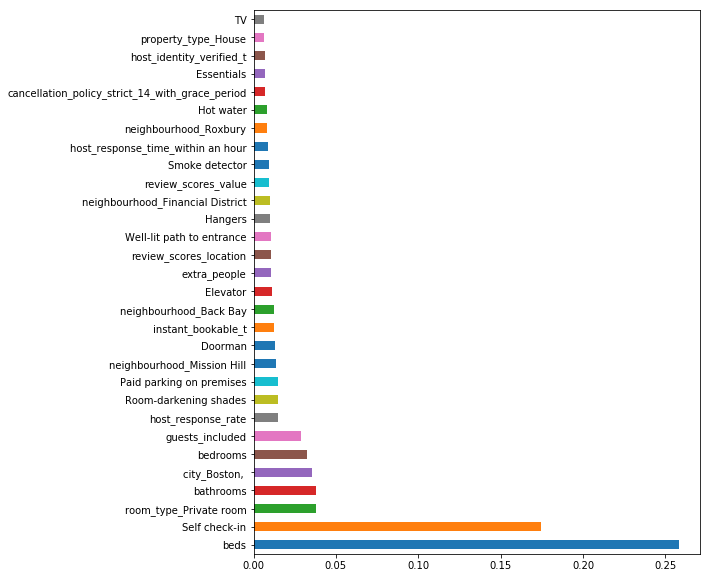

In [203]:
model = RandomForestRegressor().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [10, 50, 100, 150, 200], 'max_features': [4, 6, 8, 10]},]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                       scoring='neg_mean_squared_error')
grid_fit = grid_search.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
best_params = grid_fit.best_params_

In [ ]:
Regrs_C = RandomForestRegressor(random_state=42)
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = Regrs_C.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

### Create a function to put all the previous clean process in it.

In [ ]:
#Create a function to put all the actions I did before to clean the data.

def clean_data(df):
    '''Output of this function is a clean data after applying for all the data cleanning process.
    
    Input: 
    1.Define X and y for later use
    2.Drop the columns with more than 80% missing data.
    3.Clean and organize the string type data.
    4.Clean the "amenities" column.
    5.Remove the currency unit "$" from all the money columns.
    6.Convert the columns into numeric
    7.Clean and organize the integer or float type data.
    8.Transform the categorical data.
    '''
    
    # Drop rows with missing price values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']
    
    y = y.str.lstrip('$')
    y = y.str.replace(',','')
    y = pd.to_numeric(y)
    # Drop the columns with more than 80% missing value
    drop_selected_columns = [col for col in df.columns if (df[col].isnull().sum()/
                                                                   df.shape[0]>0.8)]
    for col in drop_selected_columns:
        df.drop(col, axis=1, inplace=True)
        
    # Create one table to put all the string data in it and drop the ones with unique value equal to 1 or more than 1000
    unique_value = df.select_dtypes(include=['object']).nunique()
    unique_value_is_1 = unique_value[unique_value==1].index
    unique_value_more_than1000 = unique_value[unique_value > 800].index & unique_value[unique_value < 7500].index
    df = df.drop(columns =unique_value_is_1,axis=1)
    df = df.drop(columns =unique_value_more_than1000,axis=1)
      
    # Replace the " in the amenities and split them and put into different columns
    amenities = df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").
                                           replace("}", "") for amenity in d.split(",")])
    df['amenities'] = amenities
    possible_amenities = set([item for sublist in amenities for item in sublist])
    possible_amenities = list(possible_amenities)
    mlb = MultiLabelBinarizer()
    amenities_result = pd.DataFrame(mlb.fit_transform(df['amenities']),
                                columns=mlb.classes_, index=df.index)
    df = pd.concat([df, amenities_result], axis=1, sort = False)
    df.drop(['amenities'], axis = 1, inplace = True)
    
    
    # Convert 'price' from string to numeric
    df['price'] = df['price'].str.lstrip('$')
    df['cleaning_fee'] = df['cleaning_fee'].str.lstrip('$')
    df['security_deposit'] = df['security_deposit'].str.lstrip('$')
    df['extra_people'] = df['extra_people'].str.lstrip('$')
    #Now let's convert the string into float by removing ","
    df['price'] = df['price'].str.replace(',','')
    df['cleaning_fee'] = df['cleaning_fee'].str.replace(',','')
    df['security_deposit'] = df['security_deposit'].str.replace(',','')
    df['extra_people'] = df['extra_people'].str.replace(',','')
    df['price'] = pd.to_numeric(df['price'])
    df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'])
    df['security_deposit'] = pd.to_numeric(df['security_deposit'])
    df['extra_people'] = pd.to_numeric(df['extra_people'])
    
    # Lets remove the % in the "host_response_rate" and convert this column into number.
    df['host_response_rate'] = df['host_response_rate'].str.rstrip('%')
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])
    
    # Translate the Chinese word into English
    df.city = df.city.str.replace('波士顿', 'Boston')
      
    # Drop these columns
    to_drop = ['host_location','host_verifications','calendar_updated','host_neighbourhood',
           'smart_location','neighbourhood_cleansed', 'street','zipcode','description', 'name', 
           'picture_url','listing_url', 'market', 'host_has_profile_pic','jurisdiction_names']
    df = df.drop(columns =to_drop,axis=1)
    
    
    #lets put the this in a dataframe to use better later.
    unique_value_int = df.select_dtypes(include=['float64', 'int64']).nunique()
    #Choose the unique value is 1 and more than 1000 then put them into 2 different dataframes to drop it later.
    unique_value_int_more_than400 = unique_value_int[unique_value_int>400].index
    unique_value_int_between350and50 = unique_value_int[unique_value_int>50].index & unique_value_int[unique_value_int<350].index
    unique_value_int_is1= unique_value_int[unique_value_int == 1].index
    
    # Drop them
    df = df.drop(columns = unique_value_int_between350and50,axis=1)
    df = df.drop(columns = unique_value_int_more_than400, axis=1)
    df = df.drop(columns = unique_value_int_is1, axis=1)
    
    df = df.drop(['availability_365','accommodates', 'minimum_nights', 'calculated_host_listings_count', 
                                      'calculated_host_listings_count_entire_homes','availability_30', 
                                      'calculated_host_listings_count_private_rooms',
                                      'calculated_host_listings_count_shared_rooms',
                                     'minimum_minimum_nights'], axis=1)
    
     # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float64', 'int64', 'float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    cate_vars = df.select_dtypes(include=['object']).columns
    for col in cate_vars:
        df[col].fillna((df[col].mode()), inplace=True)
    
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    
    X = X.drop('price', axis=1)
    return X, y

#Use the function to create X and y

### Access the data - Seattle Listing data

In [323]:
seattle_listing = pd.read_csv('listings_1.csv')

C:\Users\Sai.Zhang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Clean the data - Seattle Listing data

In [351]:
X, y = clean_data(seattle_listing)

### Train and test the data, build a Machine Learning Model - Seattle Listing data

In [355]:
# Split the 'features' and 'income' data into training and testing sets
feature = X
price = y
feature_train, feature_test, price_train, price_test = train_test_split(feature, price, test_size=0.2, random_state=42)

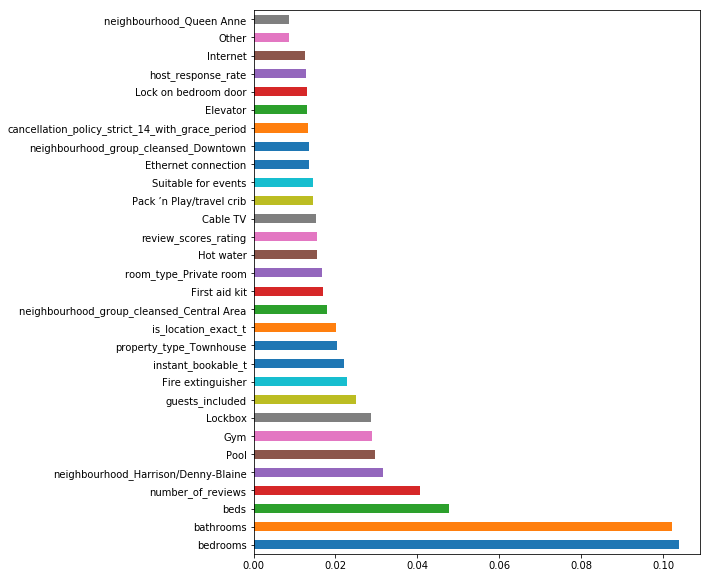

In [356]:
model2 = RandomForestRegressor().fit(feature_train,price_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model2.feature_importances_

# Plot
feat_imp = pd.Series(model2.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

### Seattle VS Boston - Most predictive features

As you can see in Seattle, for the price trend, the most predictive features, lets say the features which influence most on the price change is 

- Number of bedrooms 
- number of bathrooms 
- number of beds
- number of reviews
- Neighbourhoods

In Boston, the most predictive Features are:

- Number of beds
- Self check in system
- Private room type
- Number of bathrooms
- City center of Boston
